In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
import geopandas
import os

In [3]:
path = r'/Users/polinarozhkova/Desktop/GitHub/cr_eda_chicago/'

In [4]:
district_shp = os.path.join(path, 'PoliceDistrict', 'PoliceDistrict.shp')
df_district = geopandas.read_file(district_shp)
df_district['DIST_NUM'] = df_district['DIST_NUM'].astype(float)

In [5]:
beat_shp = os.path.join(path, 'Boundaries - Police Beats (current)',
                        'geo_export_7f053540-59bf-4d25-b453-b6f10b77c115.shp')
beat_df = geopandas.read_file(beat_shp)
beat_df['beat_num'] = beat_df['beat_num'].astype(float)
beat_df['district'] = beat_df['district'].astype(float)
beat_df = beat_df.rename(columns={'district': 'DIST_NUM'})

In [6]:
# Additional data: Homicides, Clearance Rates, Racial Demographics
final_merge_df = pd.read_csv(os.path.join(path, 'clean_data/merge_all.csv'))
cr_reports = pd.read_excel(os.path.join(path, 'inputs/CR_from_CPD_Annual_Reports_copy.xlsx'))
beats_race = pd.read_csv(os.path.join(path, 'inputs/beat_estimates.csv'))

In [7]:
# Racial Demographics by Beat
race_2021 = beats_race[beats_race['year'] == 2021].drop(
    columns='Unnamed: 0').reset_index(drop=True)
race_2021['perc_white'] = round((race_2021.white_nothisp/race_2021.tot_pop)*100, 2)
race_2021['perc_black'] = round((race_2021.black_nothisp/race_2021.tot_pop)*100, 2)
race_2021['perc_hisp'] = round((race_2021.tot_hisp/race_2021.tot_pop)*100, 2)

In [8]:
final_merge_df.head(10)

,case_number,unique_id,date_x,block_x,primary_type,iucr,age,sex,race,month,...,year,id,date,injury_type,cleared,date_clear,beat,district,time_to_clear,year_cleared
0,G011117,HOM-G011117-#1,2001-01-06 03:30:00,8700 S BURLEY AVE,HOMICIDE,110,20-29,M,BLK,1,...,2001,644.0,2001-01-06 00:00:00,SHOT,Y,2001-02-27,424.0,4.0,52 days 00:00:00,2001.0
1,G011288,HOM-G011288-#1,2001-01-06 08:54:00,1700 S ASHLAND AVE,HOMICIDE,110,20-29,M,BLK,1,...,2001,639.0,2001-01-06 00:00:00,SHOT,N,NaN,1222.0,12.0,NaN,NaN
2,G032407,HOM-G032407-#1,2001-01-16 01:17:00,600 N CICERO AVE,HOMICIDE,110,20-29,M,BLK,1,...,2001,659.0,2001-01-16 00:00:00,SHOT,Y,2001-05-28,1111.0,11.0,132 days 00:00:00,2001.0
3,G040822,HOM-G040822-#1,2001-01-20 01:09:00,1000 N CICERO AVE,HOMICIDE,110,0-19,M,BLK,1,...,2001,663.0,2001-01-20 00:00:00,SHOT,Y,2001-01-24,1111.0,11.0,4 days 00:00:00,2001.0
4,G042730,HOM-G042730-#1,2001-01-21 01:15:00,7800 S CONSTANCE AVE,HOMICIDE,110,20-29,M,BLK,1,...,2001,666.0,2001-01-21 00:00:00,SHOT,Y,2001-02-26,414.0,4.0,36 days 00:00:00,2001.0
5,G057222,HOM-G057222-#1,2001-01-28 03:11:00,4200 W LAKE ST,HOMICIDE,110,20-29,M,BLK,1,...,2001,670.0,2001-01-28 00:00:00,SHOT,Y,2001-02-09,1114.0,11.0,12 days 00:00:00,2001.0
6,G060538,HOM-G060538-#1,2001-01-29 19:00:00,3600 W GEORGE ST,HOMICIDE,110,20-29,M,BLK,1,...,2001,673.0,2001-01-29 00:00:00,SHOT,N,NaN,2523.0,25.0,NaN,NaN
7,G063251,HOM-G063251-#1,2001-01-31 00:50:00,6400 N CAMPBELL AVE,HOMICIDE,110,50-59,M,API,1,...,2001,679.0,2001-01-31 00:00:00,ASSAULT,Y,2001-03-13,2412.0,24.0,41 days 00:00:00,2001.0
8,G065240,HOM-G065240-#1,2001-02-01 00:10:00,1600 W HOWARD ST,HOMICIDE,110,30-39,M,BLK,2,...,2001,676.0,2001-02-01 00:00:00,SHOT,N,NaN,2422.0,24.0,NaN,NaN
9,G068951,HOM-G068951-#1,2001-02-02 20:54:00,7800 S SANGAMON ST,HOMICIDE,110,20-29,M,BLK,2,...,2001,677.0,2001-02-02 00:00:00,SHOT,Y,2001-03-12,621.0,6.0,38 days 00:00:00,2001.0


In [9]:
def clean(df):
    df = df.rename(columns={'ward_x': 'ward', 'beat': 'beat_num','district': 'DIST_NUM'})
    df['cleared'] = df['cleared'].map({'Y': 1, 'N': 0})
    df['gunshot_injury'] = final_merge_df['gunshot_injury_i'].map({'YES': True, 'NO': False})
    return df

In [10]:
final_merge_df = clean(final_merge_df)

In [11]:
final_merge_df.groupby(['DIST_NUM'])['cleared'].sum().reset_index()

,DIST_NUM,cleared
0,1.0,83
1,2.0,227
2,3.0,366
3,4.0,444
4,5.0,352
5,6.0,428
6,7.0,438
7,8.0,384
8,9.0,395
9,10.0,372


In [12]:
def map_points(df, df_district):
    df_district = df_district.merge(df, on=['DIST_NUM']).reset_index()
    return df_district

In [13]:
def district_grouped(df, df_cleared, df_district):
    hom_district = df.groupby(['DIST_NUM'])['case_number'].count().reset_index()
    hom_district = hom_district.rename(columns={'case_number': 'homicide_count'})
    clear_district = df.groupby(['DIST_NUM'])['cleared'].sum().reset_index()
    hom_district = hom_district.merge(clear_district, on=['DIST_NUM']).reset_index()
    hom_district['dist_cr'] = hom_district.cleared/hom_district.homicide_count
    df_district = df_district.merge(hom_district)
    df_district = df_district.to_crs('EPSG:4326')
    return df_district

In [14]:
def district_cr(df):
    new_df = df[['DIST_NUM', 'dist_cr']]
    return new_df

In [15]:
def beat_grouped(df, df_cleared, beat_df, new_df):
    hom_beat = df.groupby(['beat_num'])['case_number'].count().reset_index()
    hom_beat = hom_beat.rename(columns={'case_number': 'homicide_count'})
    clear_beat = df.groupby(['beat_num'])['cleared'].sum().reset_index()
    hom_beat = hom_beat.merge(clear_beat, on=['beat_num']).reset_index()
    hom_race_merge = pd.merge(hom_beat, race_2021, how="inner", on=['beat_num'])
    hom_race_merge['beat_cr'] = round((hom_beat.cleared/hom_beat.homicide_count)*100, 2)
    beat_df = beat_df.merge(hom_race_merge, on=['beat_num'])
    beat_df = beat_df.merge(new_df, on=['DIST_NUM'])
    beat_df = beat_df.to_crs('EPSG:4326')
    return beat_df

In [16]:
hom_2019 = final_merge_df[final_merge_df['year'] == 2019]
hom_2020 = final_merge_df[final_merge_df['year'] == 2020]
hom_2021 = final_merge_df[final_merge_df['year'] == 2021]

In [17]:
clear_2019 = final_merge_df[final_merge_df['year_cleared'] == 2019]
clear_2020 = final_merge_df[final_merge_df['year_cleared'] == 2020]
clear_2021 = final_merge_df[final_merge_df['year_cleared'] == 2021]

In [18]:
number_hom_2019 = map_points(hom_2019, df_district)
number_hom_2020 = map_points(hom_2020, df_district)
number_hom_2021 = map_points(hom_2021, df_district)

In [19]:
hom_dist_2019 = district_grouped(hom_2019, clear_2019, df_district)
hom_dist_2020 = district_grouped(hom_2020, clear_2020, df_district)
hom_dist_2021 = district_grouped(hom_2021, clear_2021, df_district)

In [20]:
dist_cr_2019 = district_cr(hom_dist_2019)
dist_cr_2020 = district_cr(hom_dist_2020)
dist_cr_2021 = district_cr(hom_dist_2021)

In [21]:
hom_beat_2019 = beat_grouped(hom_2019, clear_2019, beat_df, dist_cr_2019)
hom_beat_2020 = beat_grouped(hom_2020, clear_2020, beat_df, dist_cr_2020)
hom_beat_2021 = beat_grouped(hom_2021, clear_2021, beat_df, dist_cr_2021)

In [22]:
number_hom_2019 = geopandas.GeoDataFrame(number_hom_2019, geometry=geopandas.points_from_xy(
    number_hom_2019.longitude_y, number_hom_2019.latitude_y))

number_hom_2020 = geopandas.GeoDataFrame(number_hom_2020, geometry=geopandas.points_from_xy(
    number_hom_2020.longitude_y, number_hom_2020.latitude_y))

number_hom_2021 = geopandas.GeoDataFrame(number_hom_2021, geometry=geopandas.points_from_xy(
    number_hom_2021.longitude_y, number_hom_2021.latitude_y))

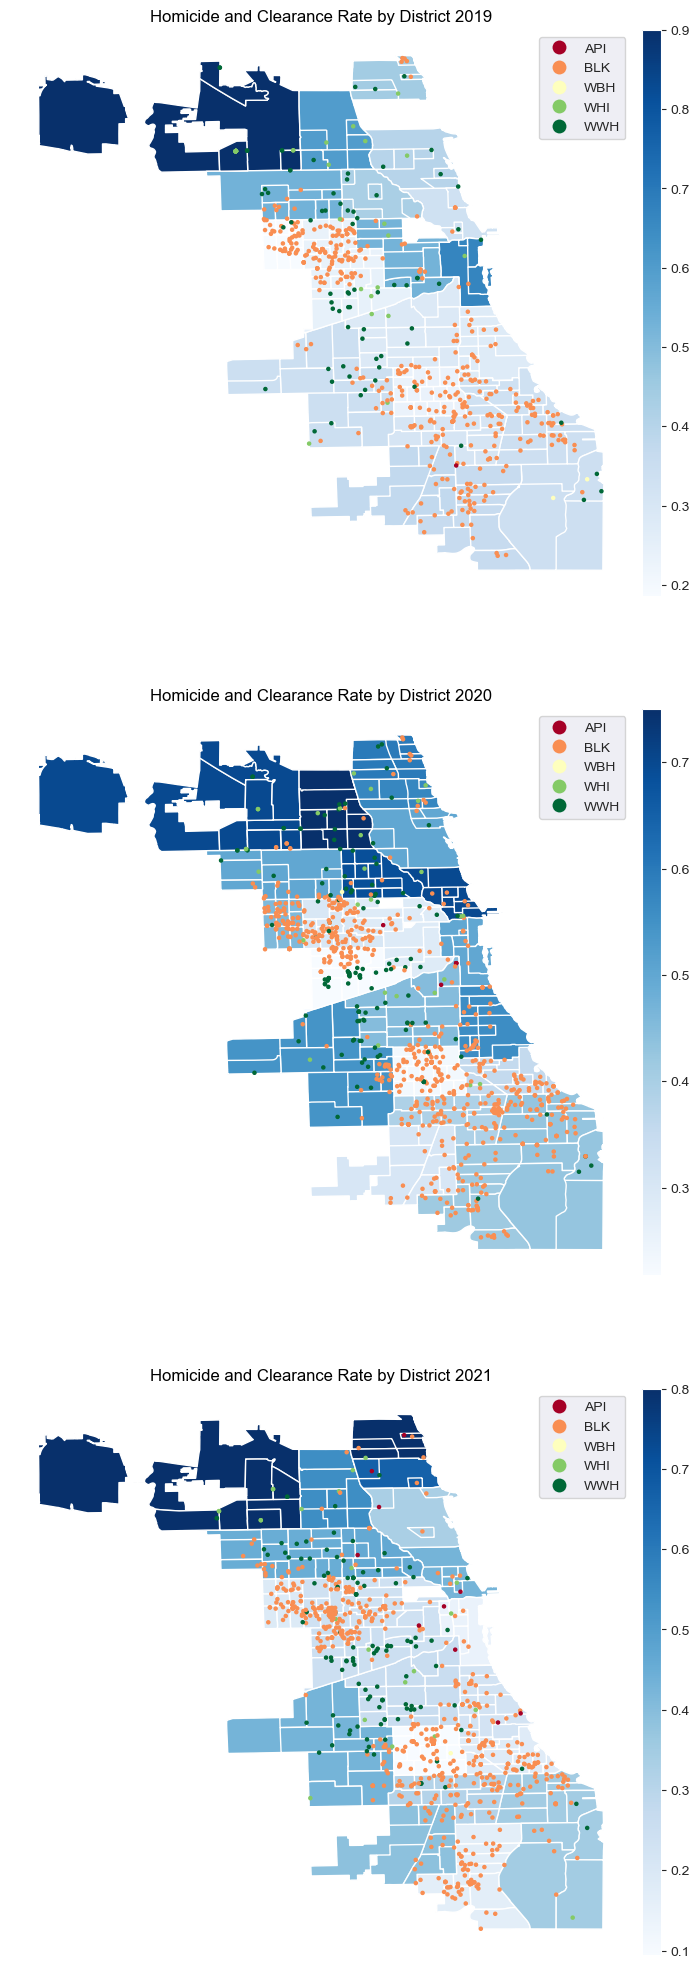

In [23]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(25, 25))
sns.set_style("dark")
ax1, ax2, ax3 = axes.flatten()

divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='3%', pad=0.1, label='test')
ax1 = hom_dist_2019.plot(ax=ax1, column='dist_cr',  missing_kwds={'color': 'lightgrey'},
                         legend=True, cax=cax, cmap='Blues', legend_kwds={'format': '%.2f%%'})
# ax1 = hom_beat_2019.plot(ax=ax1, legend=True, cax=cax, alpha=0.2)
ax1 = hom_beat_2019.plot(ax=ax1, column='dist_cr', legend=True, cax=cax, cmap='Blues')
number_hom_2019.plot(ax=ax1, column='race', cmap='RdYlGn', legend=True, markersize=5)
ax1.axis('off')


divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='3%', pad=0.1)
ax2 = hom_dist_2020.plot(ax=ax2, column='dist_cr',  missing_kwds={'color': 'lightgrey'},
                         legend=True, cax=cax, cmap='Blues')
# ax2 = hom_beat_2020.plot(ax=ax2, legend=True, cax=cax, alpha=0)
ax2 = hom_beat_2020.plot(ax=ax2, column='dist_cr', legend=True, cax=cax, cmap='Blues')
number_hom_2020.plot(ax=ax2, column='race', cmap='RdYlGn', legend=True, markersize=5)
ax2.axis('off')

divider = make_axes_locatable(ax3)
cax = divider.append_axes('right', size='3%', pad=0.1)
ax3 = hom_dist_2021.plot(ax=ax3, column='dist_cr',  missing_kwds={'color': 'lightgrey'},
                         legend=True, cax=cax, cmap='Blues')
# ax3 = hom_beat_2021.plot(ax=ax3, legend=True, cax=cax, alpha=0)
ax3 = hom_beat_2021.plot(ax=ax3, column='dist_cr', legend=True, cax=cax, cmap='Blues')
number_hom_2021.plot(ax=ax3, column='race', cmap='RdYlGn', legend=True, markersize=5)
ax3.axis('off')

ax1.set_title('Homicide and Clearance Rate by District 2019')
ax2.set_title('Homicide and Clearance Rate by District 2020')
ax3.set_title('Homicide and Clearance Rate by District 2021')
plt.savefig(os.path.join(path, 'plots/homicide_clr_map.png'))

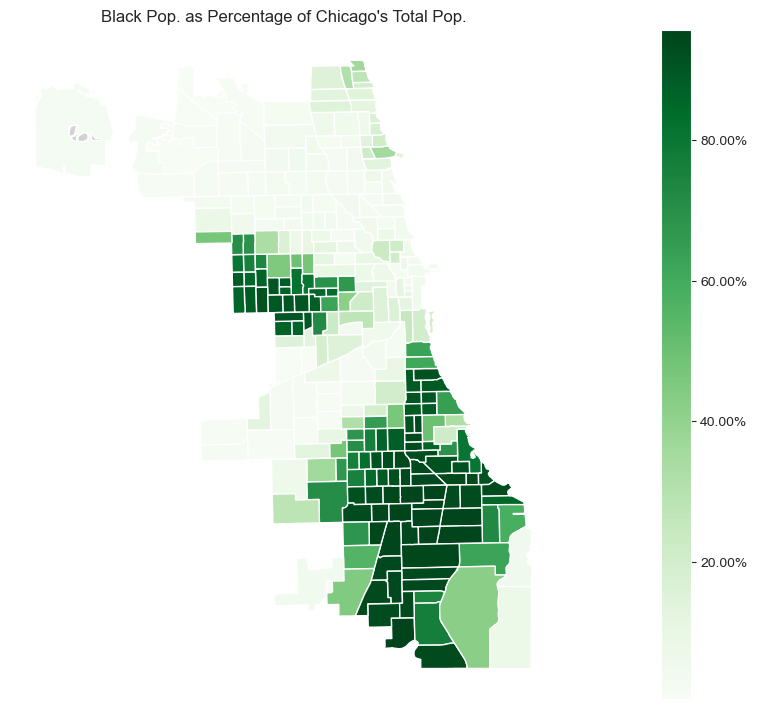

In [24]:
# map of racial demographics
beat_race_df = beat_df.merge(race_2021, on=['beat_num'])
fig, ax1 = plt.subplots(figsize=(10, 10))
sns.set_style("dark")
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='4%', pad=0.1)
ax1 = beat_race_df.plot(ax=ax1, column='perc_black',  missing_kwds={'color': 'lightgrey'},
                        legend=True, cax=cax, cmap='Greens', legend_kwds={'format': '%.2f%%'})
ax1.axis('off')
ax1.set_title("Black Pop. as Percentage of Chicago's Total Pop.", loc='center')
plt.savefig(os.path.join(path, 'plots/racial_demographics.eps'), format='eps', dpi=1000)